# GirlsWhoML Session 2: Logistic regression

Authors: Tom Joy, Christina Winkler, Shuyu Lin

* Logistic regression is really just classification... confusing I know.

* So rather than trying to fit a line to points like **linear** regression, we instead want to find a line that **separates** two clusters of points. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation 

We will first start by generating two clusters of data points. Then our task in this exercise is to define a boundary that separates the clusters, given a few observations from each cluster. When new data arrives, we can easily decide which cluster the new observation actually belongs to, i.e. **classifying** the new observation to one of the two clusters.   

*TODO: Run the below 3 code blocks and observe the two clusters of data points in the plot.* 

In [ ]:
cluster_centres = np.array([[-1, -3], [2, 2]])
colour_list = ['red', 'blue']

def generateData(num_samples_pc, dimensions=2, cluster_locs=cluster_centres):
    data = []
    labels = []

    for c, locs in enumerate(cluster_locs):
        pos = np.random.randn(num_samples_pc, dimensions) + locs
        data.append(pos)
        labels.append(np.ones(num_samples_pc) * c)

    data_np = np.concatenate(data, axis=0)
    labels_np = np.concatenate(labels, axis=0)
    return data_np, labels_np

train_data, train_labs = generateData(100)
test_data, test_labs = generateData(10)

In [ ]:
def plot_data(data, labs, a=None, b=None, c=None, color=colour_list):
  plt.xlim([-8, 8])
  plt.ylim([-8, 8])
  for ic in range(2):
      ind_class = np.where(labs == ic)
      #color = plt.cm.Set1(ic)
      plt.scatter(data[ind_class, 0], data[ind_class, 1], s=10, color=color[ic], label=str(ic))

  if a is not None and b is not None and c is not None:
    x = np.linspace(-8, 8, 10)
    y = ( - b * x - c) / a
    plt.plot(x, y)
    
  plt.ylabel("x1")
  plt.xlabel("x2")
  plt.gca().set_aspect('equal')
  plt.show()

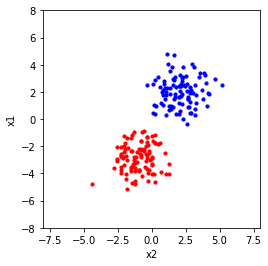

In [ ]:
plot_data(train_data, train_labs)

# Decision boundary

* The decision boundary is a line which seperates out the data points from different clusters.

* If we have a data point $\mathbf{x}$ that we want to classify, where $\mathbf{x} = \{x_1, x_2\}$ -- a 2D feature vector. Then the predicted class depends on which side of the line $\mathbf{x}$ lies.

* We represent the decision boundary of the form: $f(\mathbf{x}) = ax_1 + bx_2 + c = 0$.

* This allows us to easily compute which side of the line the point lies from looking at the sign of $f(\mathbf{x}) = ax_1 + bx_2 + c$.

* A positive sign indicates that the data point $\mathbf{x}$ belongs to the blue class, and a negative sign indicates red.



## Task 1a: Understanding decision boundary

*TODO: Have a play around with the parameters `a`, `b` and `c` in the function `plot_data()`. Try different values and observe how the decision boundary changes.*

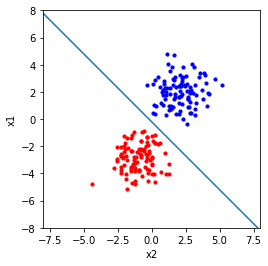

In [ ]:
plot_data(train_data, train_labs, a=5, b=5, c=1)

# Sigmoid function

* The sigmoid function is defined as: $\sigma (t) =\frac{1}{1 + exp(-t)}$

* The sigmoid function has some very nice properties (see the lecture note). An important one is that the value of the sigmoid function always lies in between 0 and 1. Hence, it's a perfect tool to model probability distributions. 

* Here, we use the sigmoid function to represent the probability that a data point $\mathbf{x}$ is from a certain class $\mathcal{C}_i$, where $i$ is either 0 or 1.

## Task 1b: Implementing sigmoid function

*TODO: Implement the sigmoid function in the code block below.*

Hint: Consider to use the `np.exp()` function. 

In [ ]:
def sigmoid(x):
  ## TODO implement sigmoid in here ##
  sigmoid_value = 
  ## TODO end ##
  return sigmoid_value

Let's plot the sigmoid function using the function below to see its shape.

*Question: What is the value of sigmoid at t=0? What is the gradient of the sigmoid for t < -5 and t > 5?*

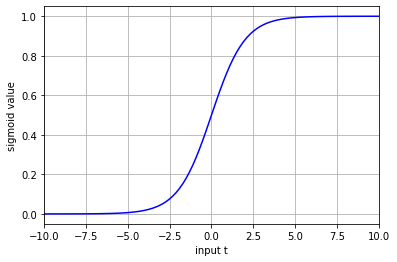

In [ ]:
t = np.linspace(-10, 10, 100)
sigmoid_t = sigmoid(t)
plt.plot(t, sigmoid_t, 'b-')
plt.xlim([-10, 10])
#plt.gca().set_aspect('equal')
plt.xlabel("input t")
plt.ylabel("sigmoid value")
plt.grid(True)
plt.show()

Now can we combine the sigmoid function with the equation of our linear decision boundary to get a predictive probability for the class labels of a 2D data point?

* Think about the output of the function $ay + bx + c$ and how that could work with the sigmoid function.

* HINT: If a point lies on the line $ay + bx + c = 0$ what is the probability that it belongs to each class?

## Task 1c: Predictive probability of a data point

*TODO: Implement a function which gives you the predictive probability $p(\mathbf{x})$ of 2D data points $\mathbf{x}=(x_1, x_2)$ being in the blue class for the given values for `a`, `b` and `c`. You will need to use the sigmoid function and evaluate $ay + bx + c$. 


In [ ]:
def predictive_prob(x, a, b, c):
  ## TODO ##
  
  pred_prob = 
  ## TODO end ##
  return pred_prob

* If the output of the sigmoid represent the probability a point $p(\mathbf{x})$ being from the blue class, what is the sign of the ewuation $ay + bx + c$?

* Test this by computing the predictive probability on the cluster centers of the red and blue points. 

* Is the predictive probability as you expect?

* We should expect a high probability that the center of the blue cluster if from the blue class and a low probability that the red cluster is from the blue class. 

In [ ]:
center_red = cluster_centres[0, :].reshape(1, -1)
center_blue = cluster_centres[1, :].reshape(1, -1)

# TODO call a function to gete the predictive probabilities that center_red and center_blue are from the blue class.
prob_red = 
prob_blue = 

print("Probability that center_red is from the blue class is: " + str(prob_red))
print("Probability that center_blue is from the blue class is: " + str(prob_blue))

Now try using a=1,  b=6, c=-1, your output should look like this:



```
Probability that center_red is from the blue class is: [2.06115362e-09]
Probability that center_blue is from the blue class is: [0.99999774]
```



# Learning Objective: Binary Cross-Entropy Loss

* We want to find a way to automatically infer the decision boundary.

* The best decision boundary is the one which will assign a low probability of a data point being `blue` if it actually belongs to the `red` class and a probability of a data point being `red` if it does belong to the `red` class.

* We use something called the Binary Cross Entropy loss to work out the decision boundary.

$$
\mathcal{L} = \sum_{i=1}^{N}- y_i\log(p(\mathbf{x}_i)) - (1 - y_i)\log(1 - p(\mathbf{x}_i))
$$

* Where $y_i$ represent $i$th element of `train_labs`, which is a vector of 0s and 1s. Here 0 indicates that the corresponding $i$th data point in `train_data` is `red` and 1 indicates that it is `blue`. $\mathbf{x}_i$ is a data point in `train_data` and $p(\mathbf{x}_i)$ represents our predictive probability that $\mathbf{x}_i$ is blue.


### Task 2a: Implement the binary cross entropy loss.

*TODO: Implement the BCE loss in the function below.* 

Hint: you will need the `np.log()` and `np.sum()` functions.



In [ ]:
def bce_loss(pred_probs, y):
  ## TODO ##

  ## TODO end ##
  return bce

In [ ]:
red_label = 0
blue_label = 1

center_red = cluster_centres[0, :].reshape(1, -1)
center_blue = cluster_centres[1, :].reshape(1, -1)

prob_red = predictive_prob(center_red, a=1, b=6, c=-1)
prob_blue = predictive_prob(center_blue, a=1, b=6, c=-1)

print("Value of BCE for red center: " + str(bce_loss(prob_red, red_label)))
print("Value of BCE for blue center: " + str(bce_loss(prob_blue, blue_label)))

You should have values similar to:

```
Value of BCE for red center: 1.000000500029089e-06
Value of BCE for blue center: 2.2603268524903463e-06
```

Do the cross entropy value for the class centres make sense? Think about where the decision boundary (blue line) is.

* In `bce_loss()`, what will happen when `pred_probs = 0` or `pred_probs = 1`? We get negative infinity! as $\log(0) = -\inf$.

* To get around this, we prevent `pred_probs` ever reaching 0 or 1. We do this using `pred_probs = np.clip(pred_probs, 1e-6, 1 - 1e-6)`. Insert this line of code at the begining of `bce_loss()`.

### Is BCE a good metric for how well our decision boundary seperates our data?

Play around with the vlaues of `a`, `b`, and `c` below to see how they effect the values of BCE loss.



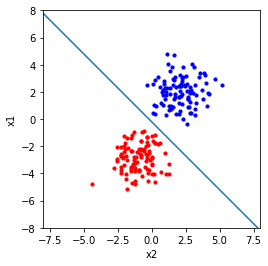

BCE loss: 0.10487904991431424


In [ ]:
a=5
b=5
c=1

plot_data(train_data, train_labs, a, b, c)
print("BCE loss: " + str(bce_loss(predictive_prob(train_data, a, b, c), train_labs)))

# Optimization with Gradient Descent (GD)

* Gradient descent may seem scary and weird at first, but it's just a way to minimize (or maximize) a function, just think of it as walking down a hill.

* If you want to walk down a hill from a random point, you'd choose a direction which points down, and then take a step.

* That's what we do a lot in machine learning (literally, this is what everyone uses all the time), but rather than take a physical step, we just move the parameters by a certain amount which we call a step. 

* For GD to be useful, we need to calculate the gradient of our loss function.

* The gradients for BCE are:

$$
\frac{\partial\mathcal{L}}{\partial a} = \sum_{i=1}^{N}(\sigma(ax_1^i + bx_2^i + c) - y^i)x_1^i
$$

$$
\frac{\partial\mathcal{L}}{\partial b} = \sum_{i=1}^{N}(\sigma(ax_1^i + bx_2^i + c) - y^i)x_2^i
$$

$$
\frac{\partial\mathcal{L}}{\partial c} = \sum_{i=1}^{N}(\sigma(ax_1^i + bx_2^i + c) - y^i)
$$

Note that $(\mathbf{x}^i, y^i)$ refer to the $i$-th data points in our observations.


### Task 3a: implementing the gradient of $a, b$ and $c$

*TODO: Complete the below code block to implement a function which returns the gradients of $a, b$ and $c$.* 

You can return multiple values from a function using `return grad_a, grad_b, grad_c`

In [ ]:
def compute_gradients(x, a, b, c, y):
  ## TODO ## 
  grad_a = 
  grad_b = 
  grad_c = 
  ## TODO end ##
  return grad_a, grad_b, grad_c

### Task 3b: implementing the gradient descent algorithm.

* You will need the following equation to take a step:

$$
a^{t+1} = a^{t} - \alpha\cdot\frac{\partial\mathcal{L}}{\partial a^{t}}
$$

* You add or subtract an amount from a variable like this: `var = var + 1`:



```
var = 5
print(var)
> 5
var = var + 2
print(var)
> 6
```





Iteration 0	Loss 94.636
Iteration 10	Loss 15.401
Iteration 20	Loss 9.566
Iteration 30	Loss 7.157
Iteration 40	Loss 5.784
Iteration 50	Loss 4.875
Iteration 60	Loss 4.219
Iteration 70	Loss 3.717
Iteration 80	Loss 3.319
Iteration 90	Loss 2.994


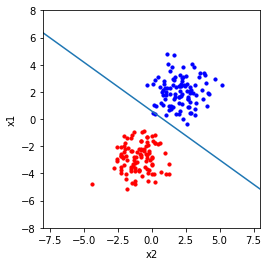

The optimised parameters are: a=3.8729211159978316, b=2.7879646517353516, c=-2.30177734372961


In [ ]:
def optimize(train_data, train_labs, num_steps):
    a, b, c = 2, -1, -5
    lr = 5e-3
    for i in range(num_steps):
      ## TODO ## 
      grad_a, grad_b, grad_c = compute_gradients(train_data, a, b, c, train_labs)
      a = 
      b = 
      c = 
      ## TODO end ## 

      if i % 10 == 0:
        print("Iteration %i\tLoss %.3f" % (i, bce_loss(predictive_prob(train_data, a, b, c), train_labs)))
        
    plot_data(train_data, train_labs, a, b, c)

    return a, b, c


a_opt, b_opt, c_opt = optimize(train_data, train_labs, 100)
print("The optimised parameters are: a=" + str(a_opt) + ", b=" + str(b_opt) + ", c=" + str(c_opt))

What do you notice about the loss value? Is it doing what you expect?

# Evaluating a Classifier

We have now found out the parameters of a linear classifier. How well does it perform on the classification task on the 2D points? On what metric should we evaluate it on? Should we evaluate it on the **training set**, a set of data points that we use to estimate the classifier's parameters? Or should it be evaluated on a held-out **test set**, a set of data points that are reserved from training and only used for evaluating the model performance? What is the importance of having these two separate sets?

We explore these questions in this section. 



*   We often use the accuracy of a classifier as the performance metric.
*   It is defined as: $ \text{Accuracy} = \frac{\text{Number of correct prediction}}{\text{Number of total prediction}}$



## Task 4a: test set

To evaluate a classifier, we first need to use it to make some predictions. At the beginning of this notebook, we generated some test data alongside of the training data. Check in the Data Generation section and look for two variables called `test_data` and `test_labs`. 

*TODO: print the two variables in the code block below and observe their shapes and values.*

In [ ]:
print(test_data.shape, test_labs.shape)
print("Test data:", test_data)
print("Test labels:", test_labs)

(20, 2) (20,)
Test data: [[-0.80987741 -4.07345184]
 [-0.13112384 -3.75712098]
 [-0.520331   -1.83451686]
 [-2.93129636 -3.14285454]
 [-0.10589082 -1.68849839]
 [ 0.75267384 -1.08023241]
 [ 1.20844922 -3.90580071]
 [-0.62437808 -2.44216769]
 [ 0.28829683 -3.75735906]
 [ 1.14878402 -2.52353887]
 [ 1.13660846  2.05950762]
 [ 1.60756723  1.72513667]
 [ 2.42236179  2.18321639]
 [ 2.17246994  2.91497715]
 [ 1.43827232  1.83752055]
 [ 2.53615862  1.76921746]
 [ 3.24880307  2.19406033]
 [ 0.41898867  2.55987277]
 [ 2.43409449  1.70990301]
 [ 2.82690367  2.53496663]]
Test labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Task 4b: making prediction 

*TODO: can you make predictions using the $a, b, c$ values that you've found in Task 4b? Please complete the below code block.*  

Hint: consider to use the `predictive_prob()` function that we've defined in Task 1c and `np.round()` to assign labels. 


In [ ]:
test_prob = predictive_prob(test_data, a=a_opt, b=b_opt, c=c_opt)
print(test_prob)

[1.12474430e-14 7.16723825e-07 2.73462329e-10 8.00994382e-06
 7.68928276e-07 2.79679949e-05 1.69806260e-09 1.31292696e-07
 2.37454394e-08 2.81466723e-11 9.99973211e-01 9.99999694e-01
 9.99861997e-01 9.99961642e-01 9.99590378e-01 9.99626448e-01
 9.96556281e-01 9.99998721e-01 9.99999874e-01 9.99576913e-01]


In [ ]:
def predict_labels(x, a, b, c):
  ## TODO ##
  prob_blue = predictive_prob(x, a, b, c)
  pred_labels = np.round(prob_blue)
  ## TODO end ##
  return pred_labels


test_labs_predicted = predict_labels(test_data, a=a_opt, b=b_opt, c=c_opt)
print("Predictions: " , test_labs_predicted)
print("Real labels: ", test_labs)

Predictions:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Real labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Task 4c: computing accuracy

With the predicted labels `test_labs_predicted` from the previous task and the ground truth test labels `test_labs`, can you now evaluate the classifier's accuracy? 

*TODO: complete the below code block that computes the classifier's accuracy. You should expect seeing a value $\approx$ `1.0`.*

Hint: consider to use `var1 == var2` to compare two variables and `np.sum()` to count the correct instances. 

In [ ]:
## TODO ##
accuracy = 
## TODO end ##
print(accuracy)

1.0
